<a href="https://colab.research.google.com/github/ToniYenC11/EmergingTech/blob/main/1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis


Useful methods and attributes from `pandas` library:
1. `head(n)` and `tail(n)` - First `n` and last `n` of the dataframe.
2. `info()` - Shows number of non-missing values per columns.
3. `columns` - Shows column names
4. `shape()` - Tuple that shows the number of rows and columns of the data frame
5. `describe()` - Summary statistics for each row
6. `corr(numeric_only=True)` - Shows correlation of each columns from different columns.

Data Visualization from `matplotlib.pyplot`:
1. `plot` - Basic line plot for time series vs continuous value
2. `bar` - Compare two different categorical data
3. `scatter` - Explore relationships between continuous variables. Can also be customized to show which categorical column the data belongs.
4. `imshow()` - `Heatmaps`. Uses a system of color coding to represent value. Each cell in the matrix is assigned a color based on the value it holds.  
5. `hist` - Histogram. Plots the number of unique values for a column in the style of a bar graph. The `y` axis is always the frequency/count.

There are also **advanced plots**

(The following are generated description by ChatGPT)

1. `violinplot`:

    A violin plot combines the features of a box plot and a kernel density plot. It shows the distribution of data across different categories and helps visualize the density of data at different values. The width of the "violin" at each point reflects the density of the data, and a central box plot shows the median and quartiles.
    
    **Use case**: To understand both the summary statistics and the distribution of the data.

2. `boxplot`:

    A box plot (or whisker plot) visualizes the distribution of data based on five summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It also displays outliers beyond the whiskers.
    
    **Use case**: To compare distributions between multiple groups or datasets.

3. `errorbar`:

    An error bar plot is used to represent the variability of data or uncertainty in a measurement. Error bars usually denote standard deviation, standard error, or confidence intervals.
    
    **Use case**: To show how much variability there is in the data or the precision of measurements.

4. `step`:

    A step plot connects data points with steps rather than straight lines, which makes it ideal for situations where changes between data points are not continuous but happen in steps (e.g., digital signals or piecewise constant functions).
    
    **Use case**: Often used for digital signal processing or when data changes at intervals.

5. `barbs`:

    Barbs are used in meteorology to display wind speed and direction on a 2D plot. Each barb shows the magnitude of the wind speed, and the direction of the arrow indicates the wind’s direction.
    
    **Use case**: Primarily used in weather forecasting to visualize wind conditions.

6. `eventplot`:

    An event plot shows events occurring along a timeline or category axis. Horizontal lines (events) are marked at specific positions on the plot, providing a clear view of when multiple events occurred in a sequence.
    
    **Use case**: Typically used in neuroscience to show neural spike timings or in other applications where timing is important.

7. `hexbin`:

    A hexbin plot is a type of heatmap where data is plotted using hexagonal bins instead of traditional rectangular bins. It’s used to visualize the density of points in scatter plots, especially when there’s a large amount of data.
    
    **Use case**: To represent the density of points in a 2D space when scatter plots become too crowded.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

Start by importing the data and implementing all commands in the exploratory data analysis.

In [ ]:
import os

# kaggle_dir = '/home/toni/Documents' # I use arch btw
# os.makedirs(kaggle_dir, exist_ok=True)

!pip install kaggle
from google.colab import files
files.upload() # upload kaggle.json (Kaggle API key)

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



# Download the Spotify dataset from Kaggle
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

# Unzip the downloaded dataset
!unzip top-spotify-songs-2023.zip

# Remove the zip file to clean up
!rm top-spotify-songs-2023.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
License(s): other
  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 1.66MB/s]
Archive:  top-spotify-songs-2023.zip
  inflating: spotify-2023.csv        


In [ ]:
# Define the EDA Pipeline (uncomment to show full output)
# def eda(df):
#     display('head') #head
#     display(df.head(2))
#     display('tail') #tail
#     display(df.tail(2))
#     display('Column Names')
#     display(df.columns)
#     display('shape:',df.shape) #Shape
#     display('info')
#     display(df.info())
#     display('summary statistic')
#     display(df.describe())

spotify_2023 = pd.read_csv('spotify-2023.csv',encoding='ISO-8859-1')

# # EDA Pipeline for dataset
# eda(spotify_2023)

## 1. Overview of Dataset

- How many rows and columns does the dataset contain?
- What are the data types of each column? Are there any missing values?



In [ ]:
print(f'There are {spotify_2023.shape[0]} rows and {spotify_2023.shape[1]} columns for the dataset.')
print(spotify_2023.info())
print(spotify_2023.isna().sum())

There are 953 rows and 24 columns for the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    i


## Answer:

- There are 953 rows and 24 columns for the dataset.
- The `info()` command shows that almost all columns are formatted as an integer `int64` with exceptions such as `track_name`, `artist(s)_name`, `key`,  and `mode`; all of which are formatted as an `object` (usually a string).
- `in_deezer_playlists`, `in_shazam_charts` and `streams` are also formatted as `object`, although they should be formatted as a numeric like `int64`.
- There are missing values based from the `info()` method. The `isna()` and `sum()` show that `in_shazam` has 50 missing values while `key` has 95 missing values.


## 2. Basic Descriptive Statistics
- What are the mean, median, and standard deviation of the `streams` column?
- What is the distribution of `released_year` and `artist_count?` Are there any noticeable trends
or outliers?

In [ ]:
# Convert the columns to numeric so that the describe() method will show its descriptive statistics
spotify_2023['streams'] = spotify_2023['streams'].replace({',': ''}, regex=True).astype('int64')


ValueError: invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

The code returned an error because one of the rows has improper values in `streams`. We can investigate this row further.

In [ ]:
row_sus = spotify_2023[spotify_2023['streams']=='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
display(row_sus)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [ ]:
# Since it is one row, we can drop the row instead, located at index 574
spotify_2023 = spotify_2023.drop(574)

# To check if it is error free,

# Convert the columns to numeric
spotify_2023['streams']= spotify_2023['streams'].replace({',': ''}, regex=True).astype('int64')

# Check
spotify_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


,streams
count,9.520000e+02
mean,5.141374e+08
std,5.668569e+08
min,2.762000e+03
25%,1.416362e+08
50%,2.905309e+08
75%,6.738690e+08
max,3.703895e+09


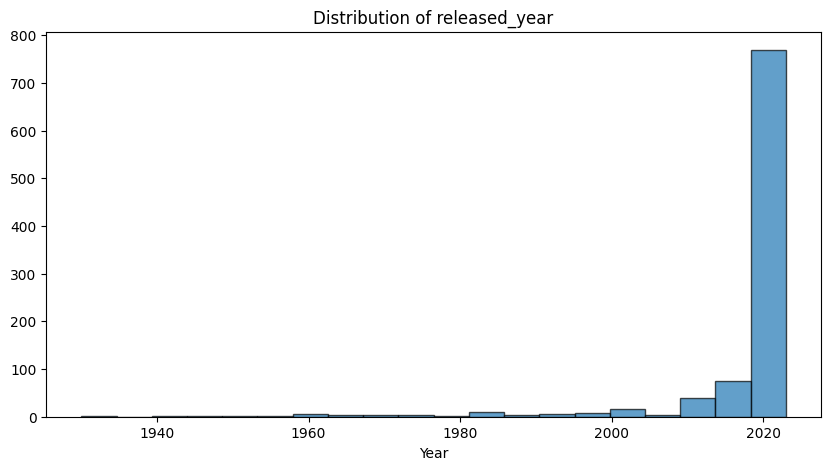

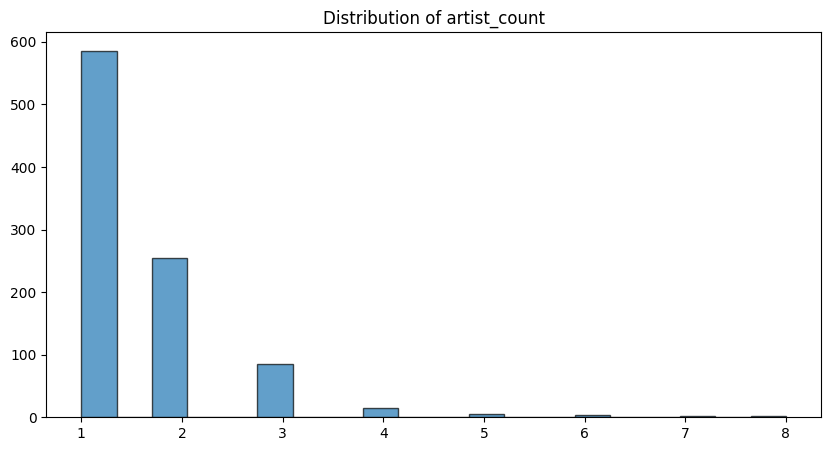

In [ ]:
# Basic Descriptive Stats
display(spotify_2023['streams'].describe())

#Plot distribution of released_year
plt.figure(figsize=(10, 5))
plt.hist(spotify_2023['released_year'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of released_year')
plt.xlabel('Year')
plt.show()

#Plot distribution of artist_count
plt.figure(figsize=(10, 5))
plt.hist(spotify_2023['artist_count'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of artist_count')
plt.show()


### Answer

The `describe` table of `streams` shows that:

- Its `mean` is $5.14\times10^8$
- Its `median` is $2.905\times10^8$
- Its `std` is $5.67\times10^8$
<br>

- The distribution of `released_year` is **left skewed**, showing that the outliers are in the left side of the distribtion.
- The distribution of `artist_count` may appear **right skewed**, as the outliers are in the right side of the distribtion, but upon further inspection, it could also be a **Log-normal** distribution instead.

## 3. Top Performers
- Which track has the highest number of streams? Display the top 5 most streamed tracks.
- Who are the top 5 most frequent artists based on the number of tracks in the dataset


,track_name,streams
55,Blinding Lights,3703895074
179,Shape of You,3562543890
86,Someone You Loved,2887241814
620,Dance Monkey,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,2808096550


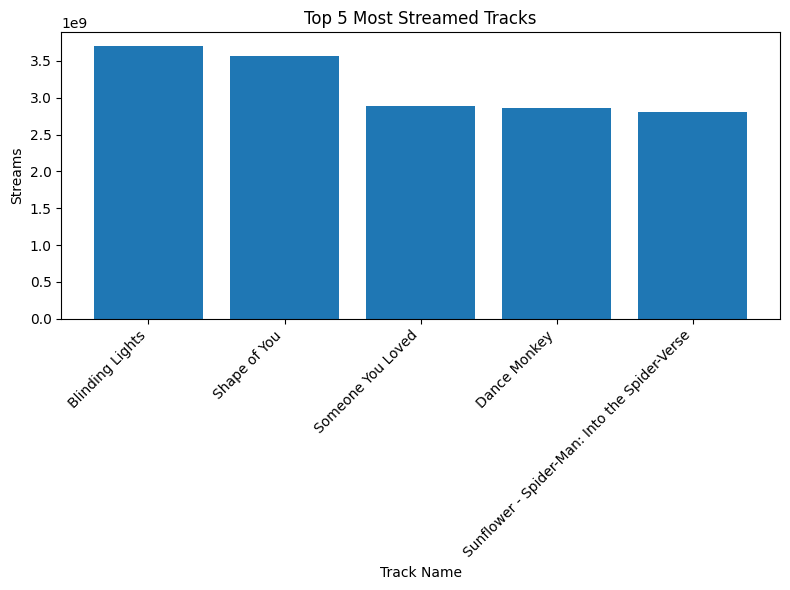

In [ ]:
# Tracks with the highest number of streams
most_streamed = spotify_2023[['track_name','streams']].sort_values(by=['streams'],ascending=False).head(5)
display(most_streamed)
plt.figure(figsize=(8, 6))
plt.bar(most_streamed['track_name'], most_streamed['streams'])
plt.title('Top 5 Most Streamed Tracks')
plt.xlabel('Track Name')
plt.ylabel('Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17


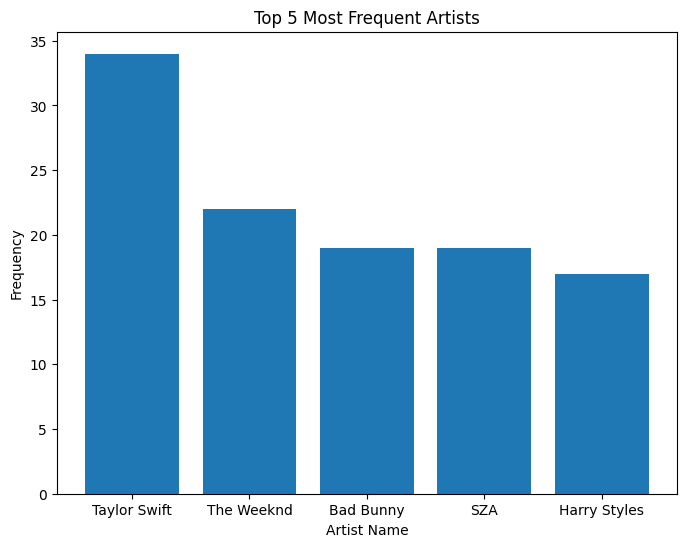

In [ ]:
# Most frequent artist based on number of tracks
most_frequent = spotify_2023['artist(s)_name'].value_counts().sort_values(ascending=False).head(5)
display(most_frequent)
plt.figure(figsize=(8, 6))
plt.bar(most_frequent.index, most_frequent.values)
plt.title('Top 5 Most Frequent Artists')
plt.xlabel('Artist Name')
plt.ylabel('Frequency')
plt.show()

### Answer

- The most streamed songs are: Blinding Lights, Shape of You, Someone You Loved, Dance Monkey, and Sunflower - Spider-Man: Into the Spider-Verse

- The most frequent artists are Taylor Swift (overrated), The Weeknd (GOATED), Bad Bunny (meh), SZA (Queen!), and Harry Styles (my dog's favorite artist).

#4.Temporal Trends
- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
- Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

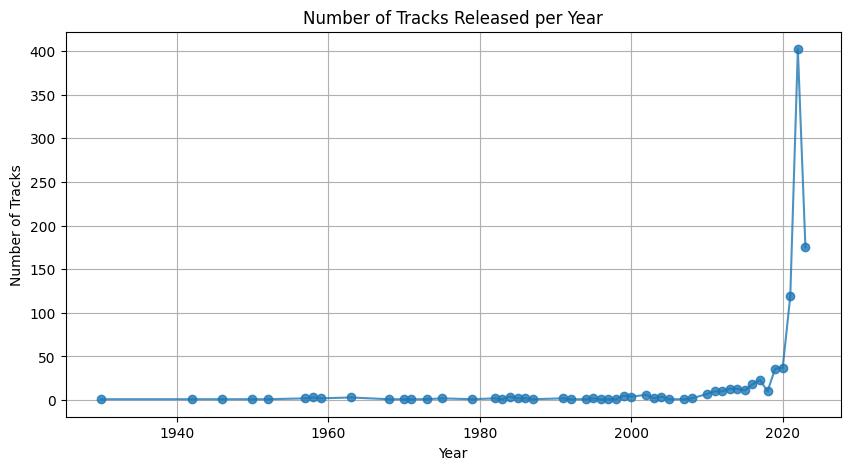

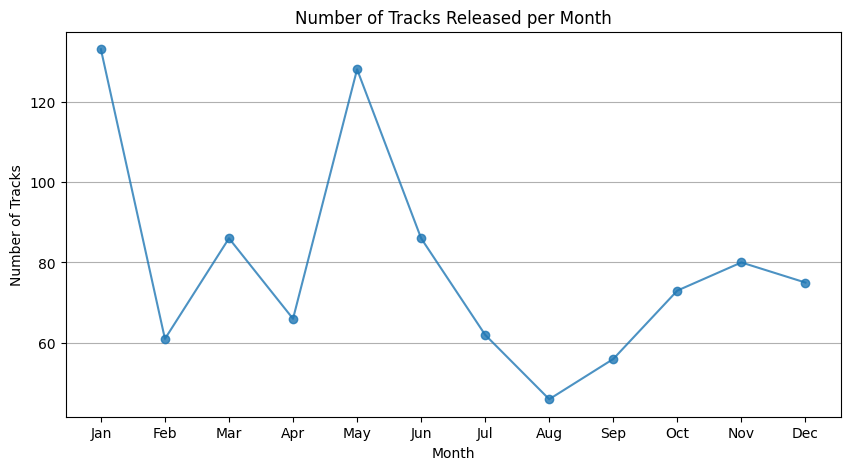

In [ ]:
# Number of tracks released per year
# Group by 'released_year' and count the number of tracks for each year
tracks_per_year = spotify_2023['released_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', alpha=0.8)
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


# Number of tracks released per month
#Count the number of tracks released per month
tracks_per_month = spotify_2023['released_month'].value_counts().sort_index()

#Plot the data
plt.figure(figsize=(10, 5))
plt.plot(tracks_per_month.index, tracks_per_month.values, marker='o', alpha=0.8)
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.show()

# Answer
- Based on the first graph, the year that has the most releases is 2022.
- Through observation of the second plot, one can identify fluctuations in the number of releases across specific months, indicating seasonal trends, such as a rise before summer (to align with festivals and summer playlists) or towards the end of the year, leading up to holidays.
- The month with the highest point in the plot, corresponding to having the most released track, is January.

#5. Genre and Music Characteristics
- Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
- Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?


                 streams       bpm  danceability_%  energy_%
streams         1.000000 -0.002438       -0.105457 -0.026051
bpm            -0.002438  1.000000       -0.147630  0.025932
danceability_% -0.105457 -0.147630        1.000000  0.198485
energy_%       -0.026051  0.025932        0.198485  1.000000


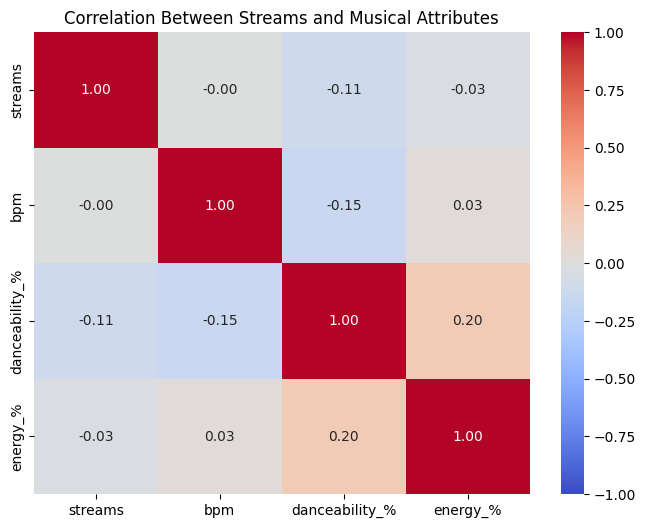

In [ ]:
# Correlation between streams and musical attributes: bpm, danceability_%, and energy_%
# Select relevant columns for correlation
correlation_matrix = spotify_2023[['streams', 'bpm', 'danceability_%', 'energy_%']].corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)

# Plot a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Between Streams and Musical Attributes')
plt.show()

Correlation between danceability_% and energy_%: 0.20
Correlation between valence_% and acousticness_%: -0.08


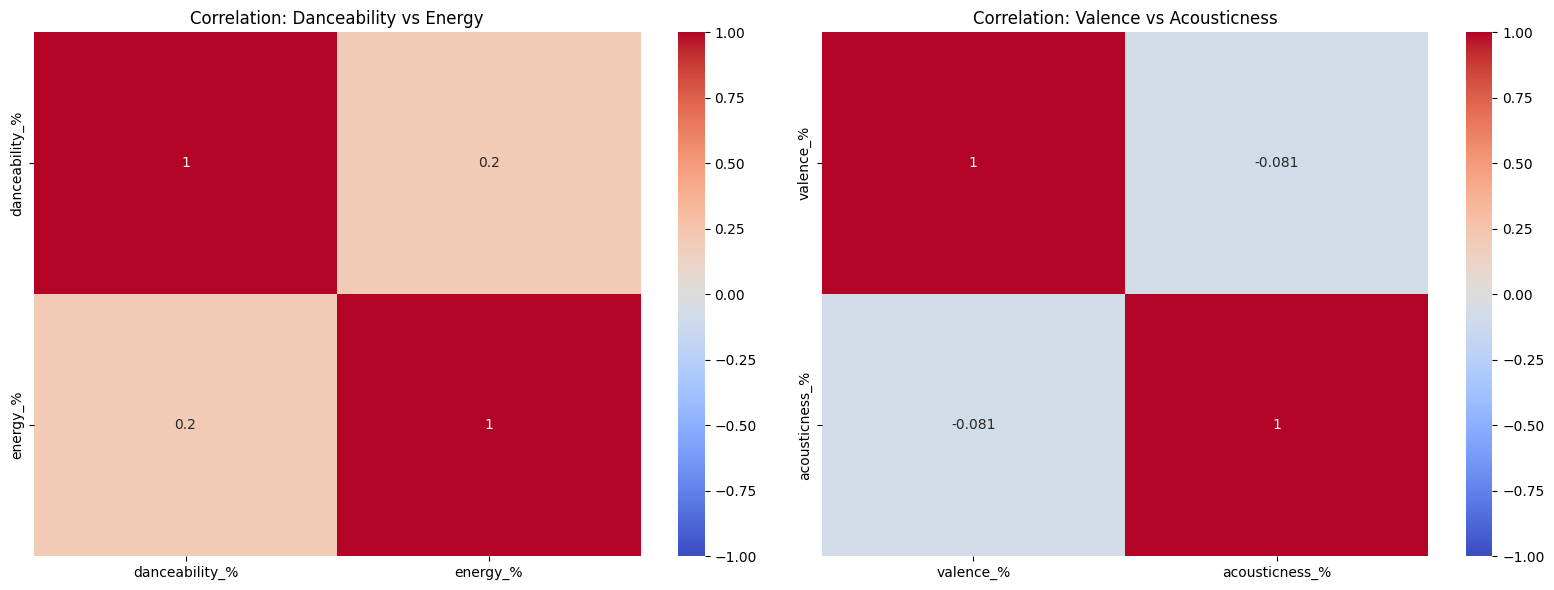

In [ ]:
# Correlation between danceability_% and energy_%
# Calculate the correlation between 'danceability_%' and 'energy_%'
correlation_danceability_energy = spotify_2023[['danceability_%', 'energy_%']].corr(numeric_only=True)

# Correlation between valence_% and acousticness_%
# Calculate the correlation between 'valence_%' and 'acousticness_%'
correlation_valence_acousticness = spotify_2023[['valence_%', 'acousticness_%']].corr(numeric_only=True)

# Print the correlation values
print(f"Correlation between danceability_% and energy_%: {correlation_danceability_energy.iloc[0,1]:.2f}")
print(f"Correlation between valence_% and acousticness_%: {correlation_valence_acousticness.iloc[0,1]:.2f}")

# Plot the heatmap
#Create subplots with 1 row and 2 columns
fig,axes=plt.subplots(1,2,figsize=(16,6))

# Plot the first heatmap on the first axis
sns.heatmap(correlation_danceability_energy, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation: Danceability vs Energy')

# Plot the second heatmap on the second axis
sns.heatmap(correlation_valence_acousticness, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation: Valence vs Acousticness')

# Display the plot
plt.tight_layout()
plt.show()

#Answer
- Among the three musical attributes, danceability_% influences the streams the most, having the highest absolute correlation (-0.105457), although its influence is still weak.
- Based on the result, there is a correlation between danceability_% and energy_% with a value of 0.20, indicating a weak positive correlation.
- This suggests that songs with higher danceability tend to have slightly higher energy levels, but the relationship is not strong.
- The correlation between valence_% and acousticness_% is -0.08, showing a very weak negative correlation.
- This means that as acousticness increases, valence (how positive or happy a song feels) slightly decreases, but the effect is minimal and not significant.


#6.Platform Popularity
- How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists
compare? Which platform seems to favor the most popular tracks?

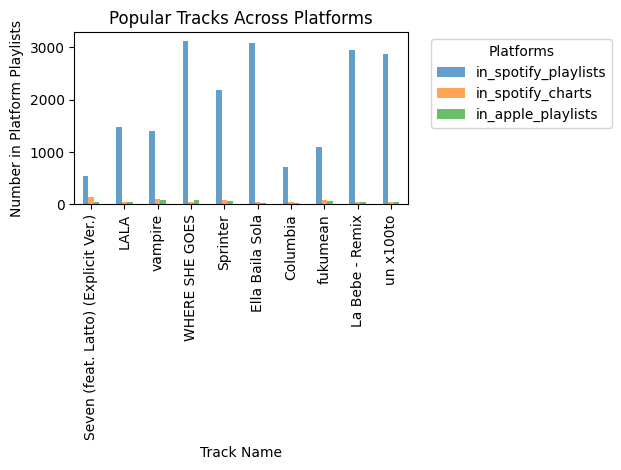

In [ ]:
# Graphing the platform where frequent tracks can be shown in 2023
popular_tracks = spotify_2023[spotify_2023['released_year'] == 2023].head(10)
popular_tracks[['track_name', 'in_spotify_playlists','in_spotify_charts' , 'in_apple_playlists']].plot(kind='bar', x='track_name', alpha = 0.7 , rot=90)
plt.title('Popular Tracks Across Platforms')
plt.xlabel('Track Name')
plt.ylabel('Number in Platform Playlists')
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

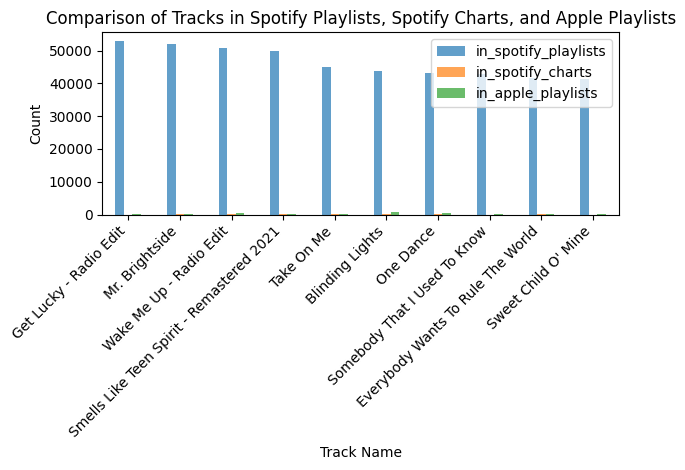

In [ ]:
# Calculate the top N tracks by streams
top_tracks = spotify_2023.groupby('track_name').agg({'in_spotify_playlists': 'sum', 'in_spotify_charts': 'sum', 'in_apple_playlists': 'sum'}).reset_index()
top_tracks = top_tracks.sort_values(by='in_spotify_playlists', ascending=False).head(10)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
top_tracks.plot(kind='bar', x='track_name', alpha = 0.7 , rot=90)
plt.xlabel('Track Name')
plt.ylabel('Count')
plt.title('Comparison of Tracks in Spotify Playlists, Spotify Charts, and Apple Playlists')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Answer
- The spotify_playlist have the higher rates of the tracks inside compare to other charts and playlists.
- Many users using the spotify playlist for their favorite tracks.

# 7. Advanced Analysis
- Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
- Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

95

,track_name,key,mode,streams
55,Blinding Lights,C#,Major,3703895074
179,Shape of You,C#,Minor,3562543890
86,Someone You Loved,C#,Major,2887241814
620,Dance Monkey,F#,Minor,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,D,Major,2808096550
162,One Dance,C#,Major,2713922350
84,STAY (with Justin Bieber),C#,Major,2665343922
140,Believer,A#,Minor,2594040133
725,Closer,G#,Major,2591224264
48,Starboy,G,Major,2565529693


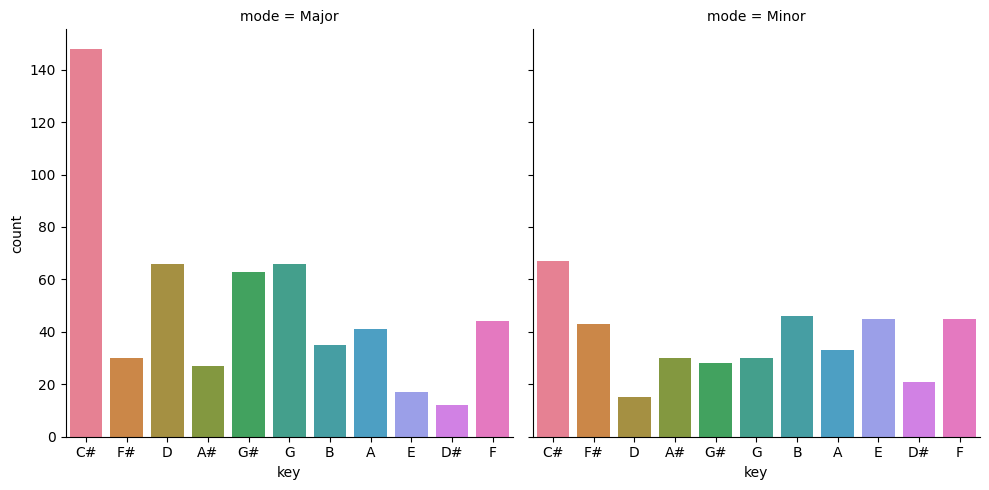

In [ ]:
# Checking the null values in keys
display(spotify_2023['key'].isna().sum())

# Filling the null values in keys
spotify_2023['key']= spotify_2023['key'].fillna('C#')
pattern_key_modes = spotify_2023[(spotify_2023['track_name'].notna()) & (spotify_2023['key'].notna()) & (spotify_2023['mode'].notna())].sort_values(by='streams', ascending=False)
display(pattern_key_modes[['track_name' , 'key' , 'mode' , 'streams']].head(20))

# Plotting
sns.catplot(x="key" , data=pattern_key_modes , kind = 'count', hue = 'key', col = 'mode')
plt.show()

# Answer for first bullet
- Checked the count of null values in key column.
- Replaced the null values with C# as it is the most used key in the dataset
- It seems that popular artist uses the C# for their key and the most popular mode here is a **major**.
- The boxplot suggests that songs in **major** keys has a higher overall number of streams and a more consistent distribution, while songs in **minor** has a lower overall number of streams and a wider range of values, with a few outliers.

In [ ]:
# Convert all these columns to numeric
spotify_2023['in_deezer_playlists'] = spotify_2023['in_deezer_playlists'].str.replace(',', '')
spotify_2023['in_deezer_playlists'] = pd.to_numeric(spotify_2023['in_deezer_playlists'])
spotify_2023['in_shazam_charts'] = spotify_2023['in_shazam_charts'].str.replace(',', '')
spotify_2023['in_shazam_charts'] = pd.to_numeric(spotify_2023['in_shazam_charts'])

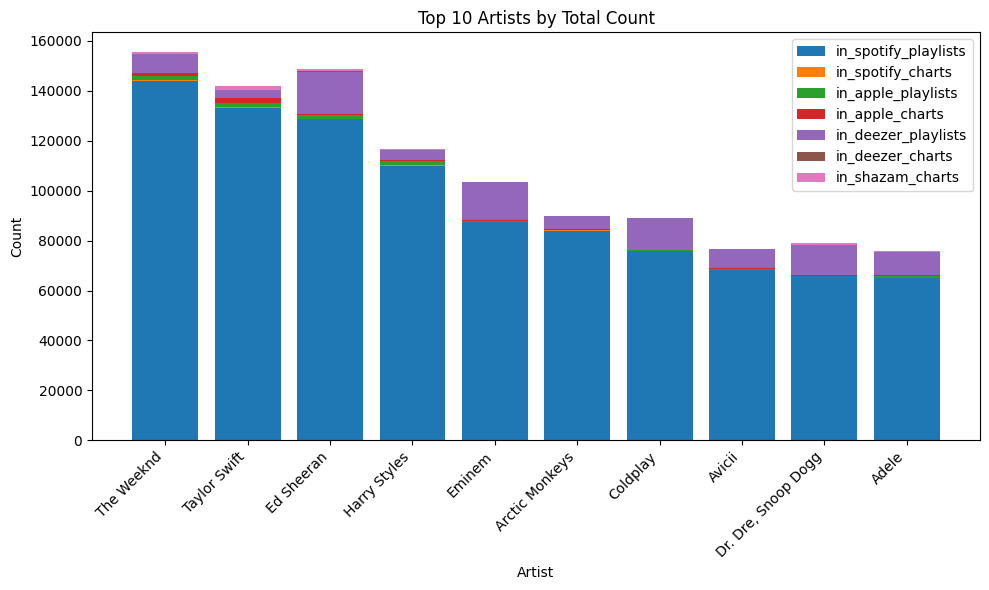

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
649,Still D.R.E.,"Dr. Dre, Snoop Dogg",2,1999,1,1,33966,0,1210599487,141,...,93,B,Major,81,53,78,18,0,6,24
653,The Next Episode,"Dr. Dre, Snoop Dogg",2,1999,1,1,31762,0,843309044,142,...,95,D#,Minor,92,31,89,3,0,8,25


In [ ]:
# Calculate the total count for each artist
artist_counts = spotify_2023.groupby('artist(s)_name').agg({
    'in_spotify_playlists': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_playlists': 'sum',
    'in_apple_charts': 'sum',
    'in_deezer_playlists': 'sum',
    'in_deezer_charts': 'sum',
    'in_shazam_charts': 'sum'
}).reset_index()

# Rank the top 10 artists
top_10_artists = artist_counts.sort_values(by=['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'], ascending=False).head(10)
# display(top_10_artists)
# Plot the histogram
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(top_10_artists))
for i, column in enumerate(['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']):
    plt.bar(top_10_artists['artist(s)_name'], top_10_artists[column], bottom=bottom, label=column)
    bottom += np.array(top_10_artists[column])

plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Top 10 Artists by Total Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

display(spotify_2023[spotify_2023['artist(s)_name']=='Dr. Dre, Snoop Dogg'])

# Answer for the second bullet
- The spotify playlist have charted artists with the most streams compared to other playlist and charts.However, Deezer playlists have the second most streams, even greater than Apple playlists.
- The Weeknd charted the most in total from combine playlist and charts count, followed by Taylor Swift.
- Ed Sheeran (The Ginger) charted the most in Deezer playlists compared to his contemporaries.
- The most popular genre based of the knowledge of the researchers alone is **Pop** followed by **Hip-Hop/Rap**.
- Eminem and Dr. Dre/Snoop Dogg are the only rap artists in the top 10. Moreover, Dr. Dre and Snoop Dogg charted the list with only two songs: "Still DRE" and "The Next Episode"

### Bonus: Visualize my Favorite Artist

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
672,HUMBLE.,Kendrick Lamar,1,2017,3,30,33206,1,1929770265,284,...,150,C#,Minor,91,42,60,0,0,9,12
763,N95,Kendrick Lamar,1,2022,5,13,5542,0,301242089,52,...,140,D#,Minor,81,39,66,38,0,12,14
768,United In Grief,Kendrick Lamar,1,2022,5,13,2575,0,156898322,4,...,87,G#,Major,52,32,83,24,0,17,43
771,Rich Spirit,Kendrick Lamar,1,2022,5,13,3486,0,173702135,20,...,96,A#,Minor,85,41,43,39,0,12,21
776,Count Me Out,Kendrick Lamar,1,2022,5,13,2729,0,126191104,3,...,134,G,Major,78,51,43,69,0,14,9
783,Worldwide Steppers,Kendrick Lamar,1,2022,5,13,1480,0,61739839,1,...,72,A#,Minor,56,56,47,76,0,8,36
797,Rich - Interlude,Kendrick Lamar,1,2022,5,13,1103,0,41210087,0,...,104,G,Major,44,74,42,88,0,9,9
801,Crown,Kendrick Lamar,1,2022,5,13,1493,0,42485571,2,...,170,C#,Minor,37,14,24,80,0,11,4
802,Auntie Diaries,Kendrick Lamar,1,2022,5,13,1545,0,37778188,1,...,78,G,Major,43,60,38,76,1,48,38
804,Mirror,Kendrick Lamar,1,2022,5,13,1929,0,53603447,2,...,92,E,Minor,66,29,65,23,0,8,7


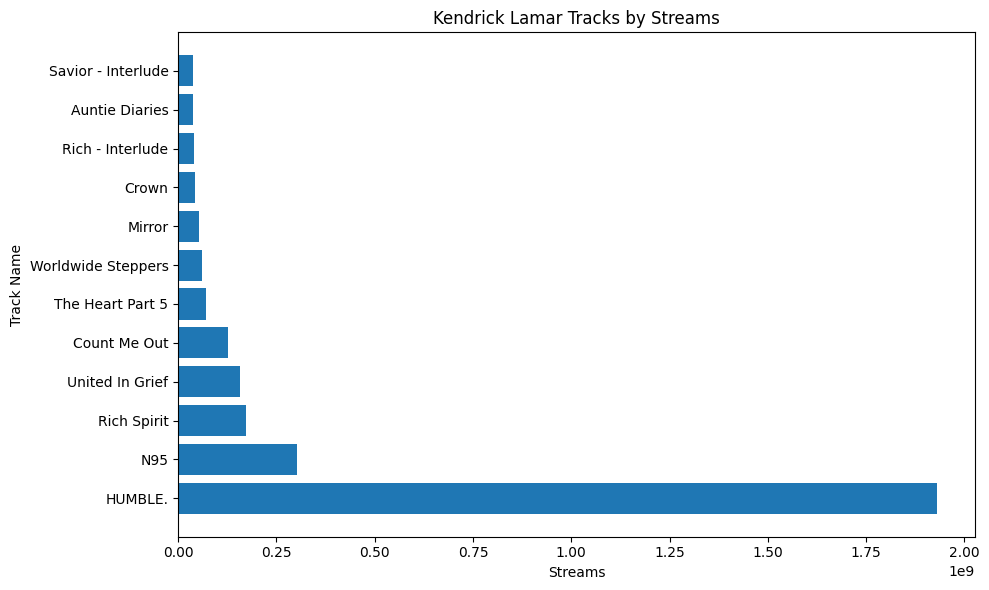

In [ ]:
# Filter the data to only include tracks by THE GOAT
THE_GOAT = spotify_2023[spotify_2023['artist(s)_name'] == 'Kendrick Lamar']
display(THE_GOAT)

# Sort the tracks by streams in descending order
THE_GOAT = THE_GOAT.sort_values(by='streams', ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(THE_GOAT['track_name'], THE_GOAT['streams'])
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Kendrick Lamar Tracks by Streams')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()